In [108]:
###############Implementing Data set###################################
import pandas as pd
df=pd.read_csv('dslab3_dataset1.csv')
print(df)

             name  prep_time  cook_time           state region  cost
0           Rabri         10         31   Uttar Pradesh  North    15
1          Sheera         11         30     Maharashtra   West    15
2         Singori         13         27     Uttarakhand  North    25
3           halwa         15         24   Uttar Pradesh  North    24
4           papdi         16         23     Maharashtra   West    33
5          jalebi         15         22          Odisha   East    25
6          kheeri         15         20          Odisha   East    25
7         Ariselu         15         20  Andhra Pradesh  South    35
8           Laddu         18         20  Andhra Pradesh  South    24
9          Chikki         19         19     Maharashtra   West    25
10           aalo         20         18       Karnataka  South    24
11         meetha         22         15       Telangana  South    35
12        Gavvalu         23         15  Andhra Pradesh  South    24
13          khaja         25      

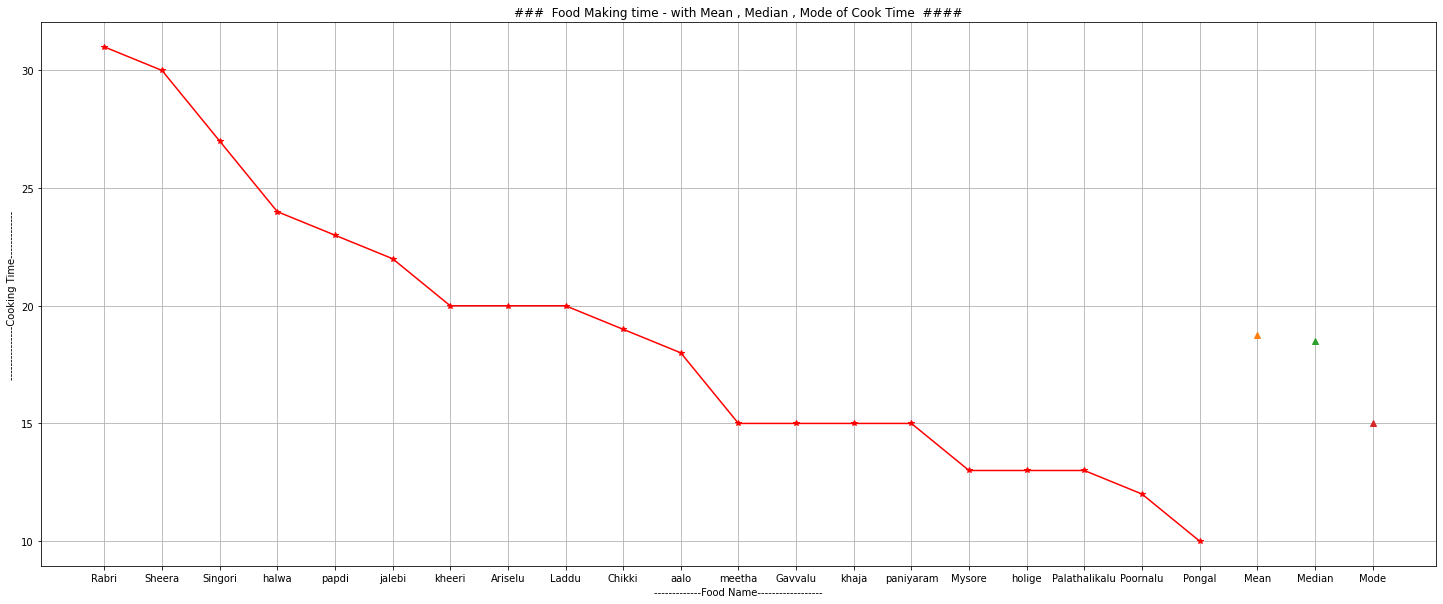

In [109]:
import matplotlib.pyplot as plt
x= df.name
y= df.cook_time
plt.figure(figsize=(25,10))
my_plot = plt.plot(x,y)
plt.xlabel("-------------Food Name------------------")
plt.ylabel("---------------Cooking Time-------------")
plt.title('###  Food Making time - with Mean , Median , Mode of Cook Time  ####')
plt.setp(my_plot,color='red',marker='*')
plt.grid(True)



##### Mean , Median , Mode calculation ###############
import numpy as np

#Mean : Def -  Average of numbers
sumOfCookTime = 0 
for i in range (0, len(df.cook_time)):
    sumOfCookTime = sumOfCookTime + df.cook_time[i]
TotalFood = df.shape[0]
MeanCookTime = sumOfCookTime/TotalFood

#Median : Def -  Middle element
df.sort_values(['cook_time'], inplace=True , ascending= True)  #Ascending Order sort
index = (int)((df.shape[0]/ 2)) 
if(len(df.cook_time) % 2): #Odd median
    Median = (df.cook_time.iloc[index -1])
else: #Even Median
    Median = ((df.cook_time.iloc[index -1]) + (df.cook_time.iloc[index])) / 2

#Mode : Def - More frequent number

Mode_Value = df.cook_time.iloc[0]
Mode_freq = 1
curr_freq = 1


for i in range (1, len(df.cook_time)):
    if(df.cook_time[i-1] == df.cook_time[i]):
        curr_freq = curr_freq + 1
    else:
        curr_freq = 1
        
    
    if(curr_freq > Mode_freq ):
        Mode_freq = curr_freq
        Mode_Value = df.cook_time[i]

#Assuming if there is no mode Median is the mode
if(Mode_freq == 1):
    Mode_Value = Median

#print (MedianCookTime)
plt.plot("Mean",MeanCookTime,marker='^') 
plt.plot("Median",Median,marker='^') 
plt.plot("Mode",Mode_Value,marker='^') 

plt.show()

First half array  [10. 12. 13. 13. 13. 15. 15. 15. 15. 18.]
Full array  [10, 12, 13, 13, 13, 15, 15, 15, 15, 18, 19, 20, 20, 20, 22, 23, 24, 27, 30, 31]
Last half array  [19. 20. 20. 20. 22. 23. 24. 27. 30. 31.]
Lower quartile : Q1 is median of first half array 14.0
Middle Quartile : Q2 is median of full array 18.5
Upper Quartile : Q3 is median of last half array 22.5


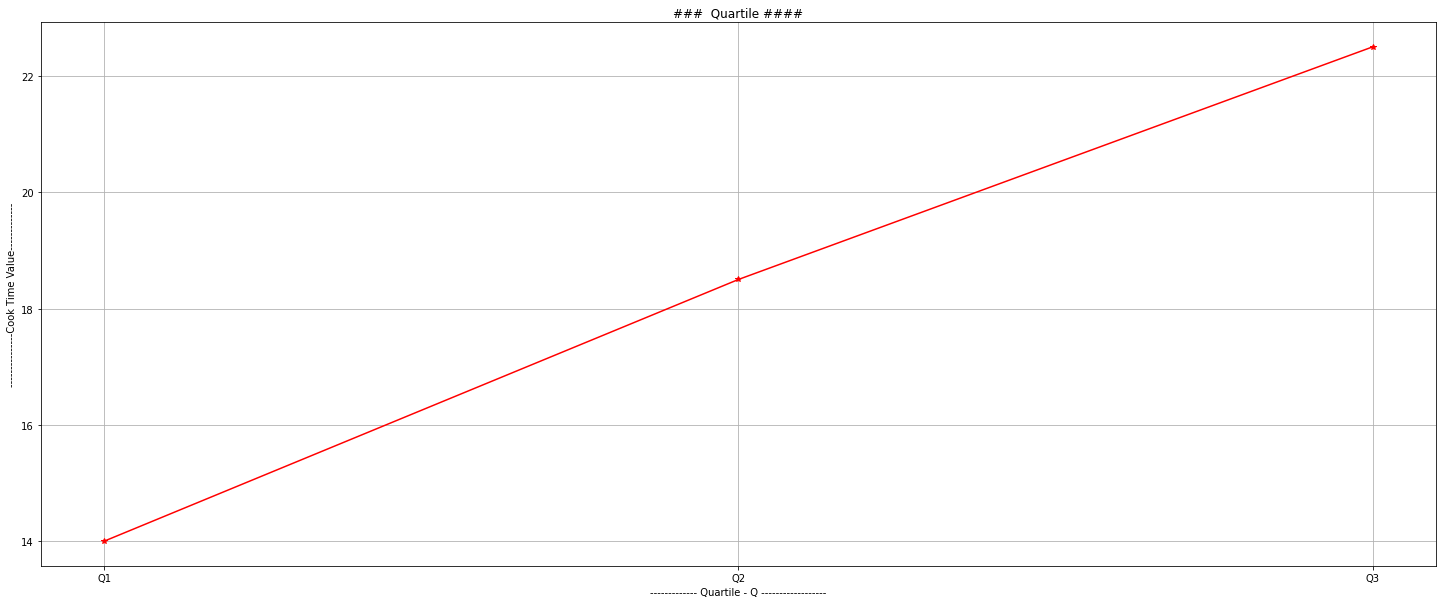

In [110]:
#Quartile : Def : Dividing data into quarters
df.sort_values(['cook_time'], inplace= True , ascending= True)  #Ascending Order sort
newdf = df.cook_time.tolist() #copy to list first


def FindMedianinArray(array , LastIndex):
    mid  = int(LastIndex / 2) - 1 # -1 since Array starts 0
    next_mid = int (LastIndex / 2) 
    if(LastIndex % 2): #Odd median
        Median = (array[mid])
    else: #Even Median
        Median = ((array[mid]) + (array[next_mid])) / 2
    return Median


lenOfQ = int ((len(newdf) )/ 2) #Array Length of each quarter

#Q1 : Median of first half array
#Highest First quartile 
First_Half_array = np.zeros(lenOfQ)
for i in range(0 , lenOfQ):
     First_Half_array[i] = newdf[i]
print("First half array ", First_Half_array)
Q1 = FindMedianinArray(First_Half_array , len(First_Half_array))

#Q2 : Median of array
#Highest Second quartile
print("Full array ",newdf)
Q2 = FindMedianinArray(newdf , len(newdf))


#Q3 : Median of last half array
# #Highest third quartile 
Last_Half_array = np.zeros(lenOfQ)
start = int(len(newdf)/2)
end = int(len(newdf))
for i in range( 0 , lenOfQ):
     Last_Half_array[i] = newdf[ start + i]
print("Last half array ",Last_Half_array)
Q3 = FindMedianinArray(Last_Half_array , len(Last_Half_array))

print("Lower quartile : Q1 is median of first half array" , Q1)
print("Middle Quartile : Q2 is median of full array", Q2)
print("Upper Quartile : Q3 is median of last half array" ,Q3)

Quartile_data = { 
    'Quartile' : ['Q1', 'Q2','Q3'],
    'Value' : [Q1 , Q2 , Q3]

}
QuartileDF = pd.DataFrame(Quartile_data)
QuartileDF.head()

plt.figure(figsize=(25,10))
QuartileDF_plot = plt.plot(QuartileDF.Quartile,QuartileDF.Value)
plt.xlabel("------------- Quartile - Q ------------------")
plt.ylabel("---------------Cook Time Value-------------")
plt.title('###  Quartile ####')
plt.setp(QuartileDF_plot,color='red',marker='*')
plt.grid(True)
plt.show()   



Food cost in array ascending  [15, 15, 22, 23, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 33, 34, 34, 35, 35]


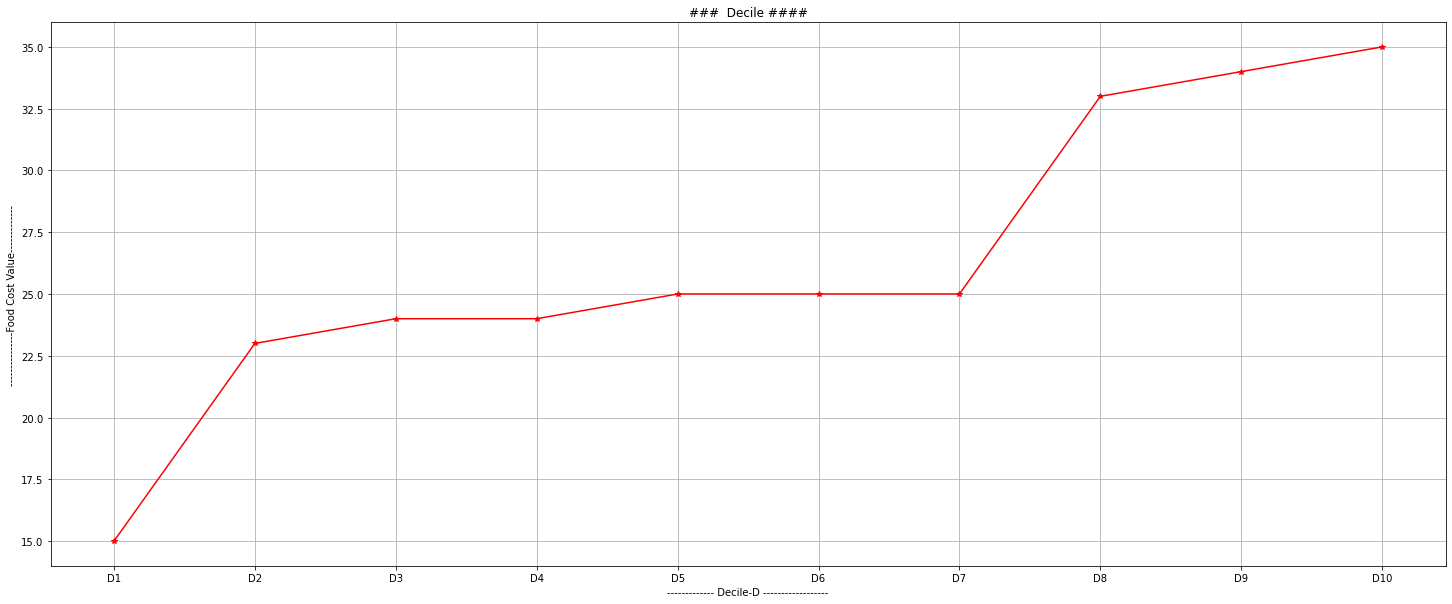

In [111]:
#Decile

df.sort_values(['cost'], inplace= True , ascending= True)  #Ascending Order sort
Cost_array = df.cost.tolist() #copy to list first
print("Food cost in array ascending ",Cost_array)

def decile(array , IndexVal):
    Decile_mid = int((len(array)) * (IndexVal/10) - 1)    # Here -1 is because we work with array , Array starts count with 0
    return array[Decile_mid]

rows = []
for i in range ( 1 ,11):
    rows.append(["D"+str(i) , decile(Cost_array ,i)])
Deciledf = pd.DataFrame(rows , columns = ["Decile" ,"Value"])
Deciledf.head()

plt.figure(figsize=(25,10))
Decile_plot = plt.plot(Deciledf.Decile,Deciledf.Value)
plt.xlabel("------------- Decile-D ------------------")
plt.ylabel("---------------Food Cost Value-------------")
plt.title('###  Decile ####')
plt.setp(Decile_plot,color='red',marker='*')
plt.grid(True)
plt.show()   


    

Food cost in array ascending  [15, 15, 22, 23, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 33, 34, 34, 35, 35]


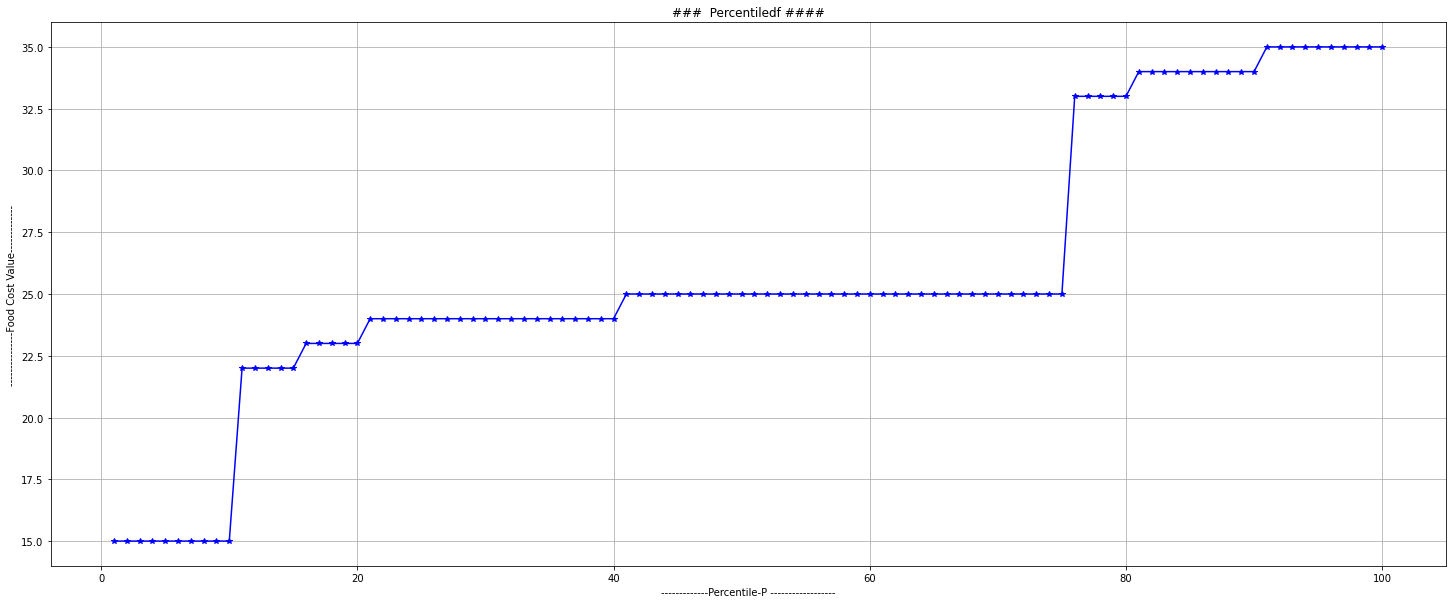

In [112]:
#Percentile

import math

df.sort_values(['cost'], inplace= True , ascending= True)  #Ascending Order sort
Cost_array = df.cost.tolist() #copy to list first
print("Food cost in array ascending ",Cost_array)

def Percentile(array , IndexVal):
    Percentile_mid = math.ceil((len(array)) * (IndexVal/100))  - 1 # Here -1 is because we work with array , Array starts count with 0
    return array[Percentile_mid]

rows = []
for i in range ( 1 ,101):
    rows.append([ i , Percentile(Cost_array ,i)])
Percentiledf = pd.DataFrame(rows , columns = ["Percentile" ,"Value"])




plt.figure(figsize=(25,10))
Percentile_plot = plt.plot(Percentiledf.Percentile , Percentiledf.Value)
plt.xlabel("-------------Percentile-P ------------------")
plt.ylabel("---------------Food Cost Value-------------")
plt.title('###  Percentiledf ####')
plt.setp(Percentile_plot,color='blue',marker='*')
plt.grid(True)
plt.show()   

Food cost in array ascending  [15, 15, 22, 23, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 33, 34, 34, 35, 35]


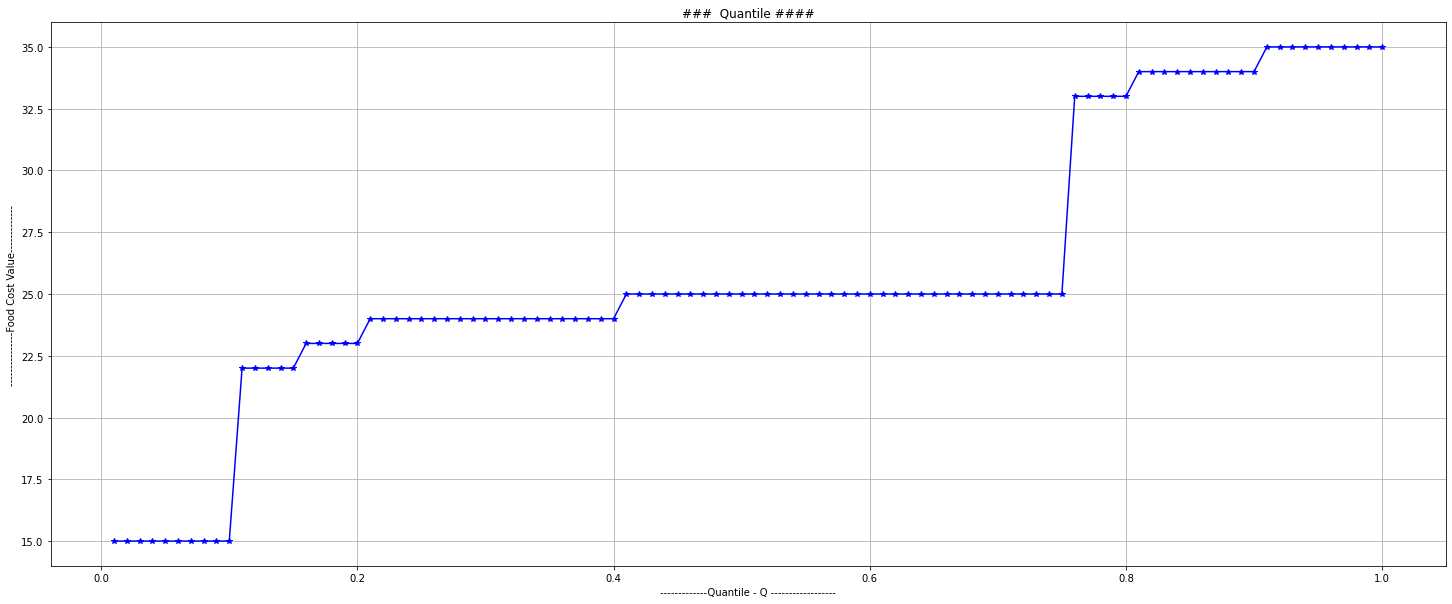

In [113]:
#Quantile - Representing between 0 to 1
df.sort_values(['cost'], inplace= True , ascending= True)  #Ascending Order sort
Cost_array = df.cost.tolist() #copy to list first
print("Food cost in array ascending ",Cost_array)

rows = []
for i in range ( 1 ,101):
    rows.append([ i /100, Percentile(Cost_array ,i)])
Quantiledf = pd.DataFrame(rows , columns = ["Quantile" ,"Value"])
plt.figure(figsize=(25,10))
Quantile_plot = plt.plot(Quantiledf.Quantile , Quantiledf.Value)
plt.xlabel("-------------Quantile - Q ------------------")
plt.ylabel("---------------Food Cost Value-------------")
plt.title('###  Quantile ####')
plt.setp(Quantile_plot,color='blue',marker='*')
plt.grid(True)
plt.show()   

In [114]:
#Range , Mean , Variance , Standard Deviation

Cost_array = df.cost.tolist() #copy to list first
print(Cost_array)

#######################Range########################
df.sort_values(['cost'], inplace= True , ascending= True)  #Ascending Order sort
Range = max(Cost_array)- min(Cost_array)
print("Range of cost array is ", Range)

####################Mean of foodcost########################
sumval= 0 
TotalFood =len(df.cost)
for i in range (0, TotalFood):
    sumval = sumval + df.cost[i]
mean = sumval/TotalFood
print("Mean of cost array is ", mean)


#################Variance of foodcost##########################
Abs_dev = 0
Var_array = Cost_array
for i in range(0, len(Cost_array)):
    Var_array[i] = Var_array[i] - mean
    Abs_dev = Abs_dev + abs(Var_array[i]) # Interpreting Absolute deviation with in Variance
    Var_array[i] = Var_array[i] * Var_array[i]

Variance = sum(Var_array) / (TotalFood - 1)
print("Variance of Food cost is " ,Variance)

##### For checking Purpose#########
import statistics
print("Variance via statistics library is ", statistics.variance(df.cost))

#################Absolute Deviation of foodcost##########################

Abs_dev = Abs_dev / TotalFood 
print("Absolute Deviation of Food cost is " ,Abs_dev)


#################Standard Deviation of foodcost##########################
SD = math.sqrt(Variance)
print("Standard Deviation of Food cost is " ,SD)





[15, 15, 22, 23, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 33, 34, 34, 35, 35]
Range of cost array is  20
Mean of cost array is  25.85
Variance of Food cost is  33.08157894736843
Variance via statistics library is  33.08157894736842
Absolute Deviation of Food cost is  4.175000000000002
Standard Deviation of Food cost is  5.751658799630627


Food cost in array ascending  [15, 15, 22, 23, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 33, 34, 34, 35, 35]

Skewness is factor which represent how much data are vary from mean
+ve Skewness: More data are vary from mean value in excess
-ve Skewness: More data are vary from mean value in lower
zero Skewness: No data are vary from mean value. All are symmetrical value
Skewness of Cost_Food of all food is  0.08965520314367546
 
Kurtosis is factor which represent how data vary from normal distribution
+ve Kurtosis: More data are vary from normal distribution in peak curve
-ve Kurtosis: More data are vary from normal distribution in flat curve
zero Kurtosis: Data is exactly follows normal distribution
Kurtosis of Cost_Food of all food is  -0.2911639186374697


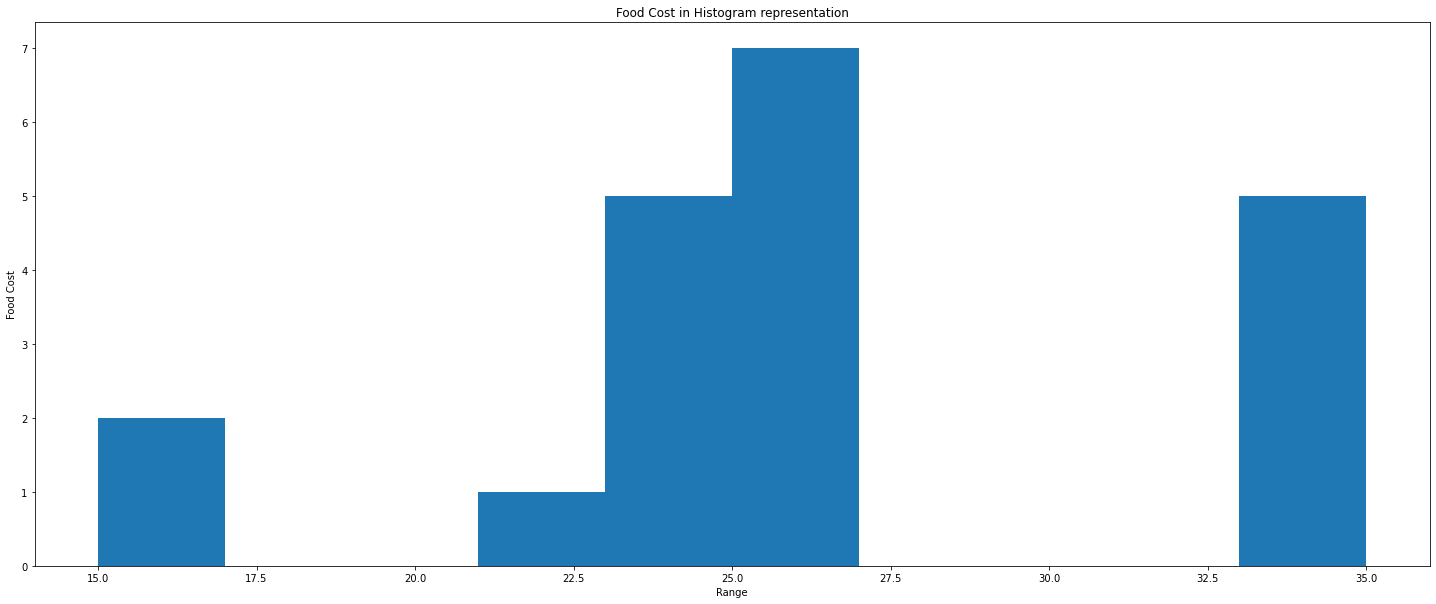

In [115]:
####################  Skew & Kurtosis  ########################

from scipy.stats import kurtosis
from scipy.stats import skew

df.sort_values(['cost'], inplace= True , ascending= True)  #Ascending Order sort
Cost_array = df.cost.tolist() #copy to list first
print("Food cost in array ascending ",Cost_array)


plt.figure(figsize=(25,10))
myplot = plt.hist(Cost_array,10)
plt.xlabel("Range")
plt.ylabel("Food Cost")
plt.title('Food Cost in Histogram representation')
plt.setp(myplot)



print("Skewness is factor which represent how much data are vary from mean")
print("+ve Skewness: More data are vary from mean value in excess")
print("-ve Skewness: More data are vary from mean value in lower")
print("zero Skewness: No data are vary from mean value. All are symmetrical value")
print("Skewness of Cost_Food of all food is ", skew(Cost_array))
print(" ")
print("Kurtosis is factor which represent how data vary from normal distribution")
print("+ve Kurtosis: More data are vary from normal distribution in peak curve")
print("-ve Kurtosis: More data are vary from normal distribution in flat curve")
print("zero Kurtosis: Data is exactly follows normal distribution")
print("Kurtosis of Cost_Food of all food is ", kurtosis(Cost_array))




plt.show()



What is Box-plot?
Representing Median, Quartiles , Participation of dataset in each quarter,  Box shape of interquarters in single picture


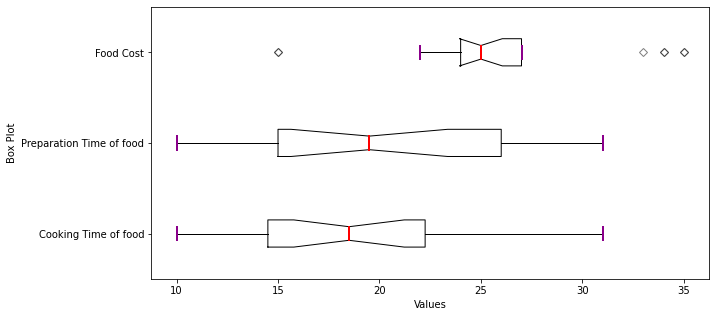

In [116]:
print("What is Box-plot?") 
print("Representing Median, Quartiles , Participation of dataset in each quarter,  Box shape of interquarters in single picture") 

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
myplot = plt.boxplot((df.cook_time, df.prep_time , df.cost), notch = True, vert = 0)

plt.xlabel("Values")
plt.ylabel("Box Plot")
ax.set_yticklabels(['Cooking Time of food' , 'Preparation Time of food','Food Cost'])

#Custoizing few parts of Box - Plots
for cap in myplot['caps']: 
    cap.set(color ='#8B008B', 
            linewidth = 2) 

for median in myplot['medians']: 
    median.set(color ='red',linewidth = 2) 
    
for flier in myplot['fliers']: 
    flier.set(marker ='D', 
              color ='#e7298a', 
              alpha = 0.5) 
plt.show()